# Support Vector Regression (SVR)

Support Vector Regression (SVR) analysis utilizing the [libSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) library.

SVR is a module of [MADS](http://madsjulia.github.io/Mads.jl) (Model Analysis & Decision Support).

SVR is one of the most powerfull and easy to use machine-learning methods.

In [1]:
import SVR
import Mads


## Example #1: Predict vector `y` based on vector `x`

In [2]:
x = sort(rand(40) * 5)
y_true = sin.(x);

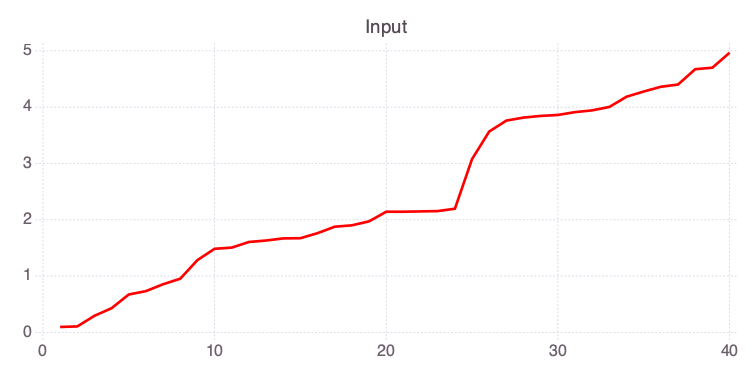

In [3]:
Mads.plotseries(x; title="Input")

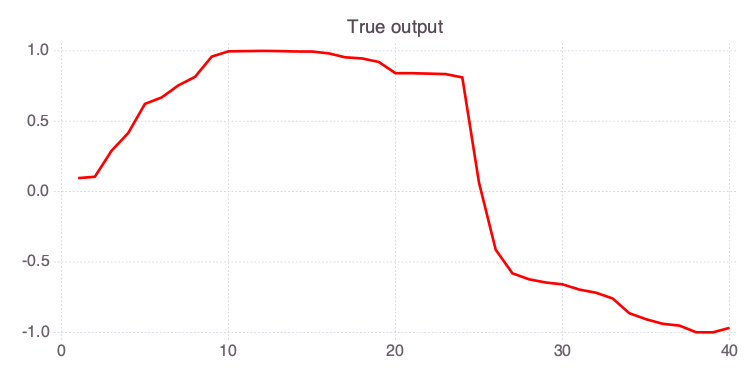

In [4]:
Mads.plotseries(y_true; title="True output")

Below, `SVR` results using diferent kernels are demonsrated.

Predict `y` based on `x` using `RBF` (radial basis function); the solutions almost perfectly overlap:

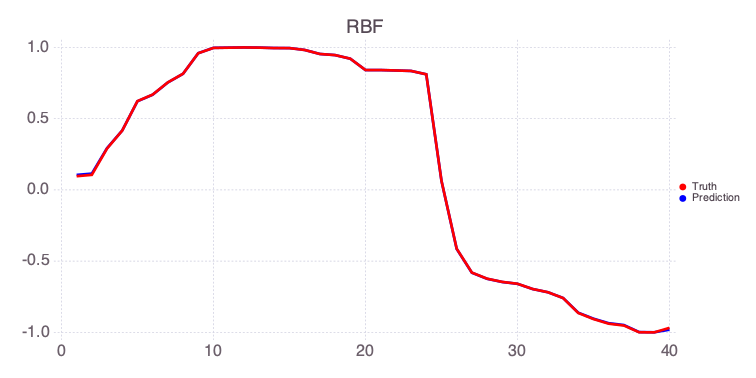

In [5]:
Mads.plotseries([y_true SVR.fit(y_true, permutedims(x); kernel_type=SVR.RBF)]; title="RBF", names=["Truth", "Prediction"])

Predict `y` based on `x` using `LINEAR`:

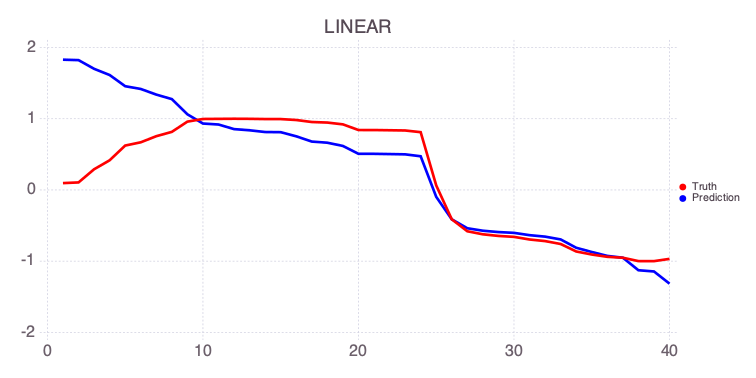

In [6]:
Mads.plotseries([y_true SVR.fit(y_true, permutedims(x); kernel_type=SVR.LINEAR)]; title="LINEAR", names=["Truth", "Prediction"])

Predict `y` based on `x` using `POLY`:

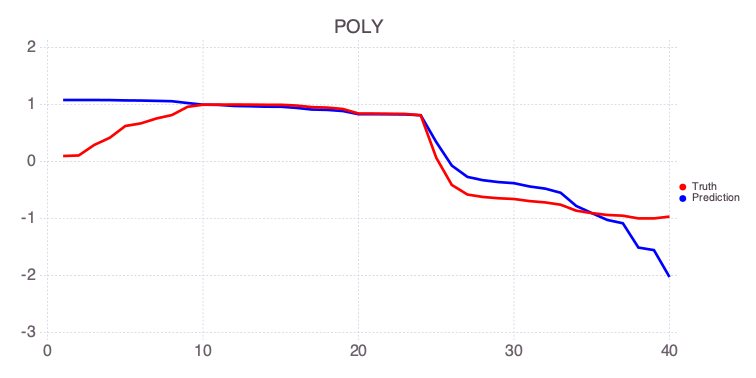

In [7]:
Mads.plotseries([y_true SVR.fit(y_true, permutedims(x); kernel_type=SVR.POLY)]; title="POLY", names=["Truth", "Prediction"])

## Example: Predicting a simple function

`SVR` is trainied to predict 3 paramter function: `a * sqrt(t) + b * t + c`, where `a`, `b` and `c` are the rows of a random matrix `y`:

In [8]:
t = collect(0:0.1:10)
y = rand(100, 3)
x = y[:,1] .* t' .^ 0.5 + y[:,2] .* t' .+ y[:,3];

The training set `x` looks like this:

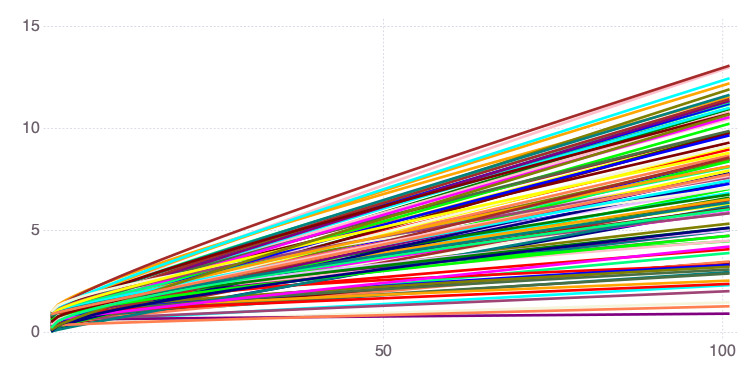

In [9]:
Mads.plotseries(x'; xmax=101)

We train `SVR` to predict `x` given `y`

In [10]:
pmodel = SVR.train(x, permutedims(y); tol=0.001, epsilon=0.1);

┌ Info: Dependent variables should be normalized!
└ @ SVR /Users/vvv/.julia/dev/SVR/src/SVRfunctions.jl:35
┌ Info: Dependent variables should be normalized!
└ @ SVR /Users/vvv/.julia/dev/SVR/src/SVRfunctions.jl:35
┌ Info: Dependent variables should be normalized!
└ @ SVR /Users/vvv/.julia/dev/SVR/src/SVRfunctions.jl:35
┌ Info: Dependent variables should be normalized!
└ @ SVR /Users/vvv/.julia/dev/SVR/src/SVRfunctions.jl:35
┌ Info: Dependent variables should be normalized!
└ @ SVR /Users/vvv/.julia/dev/SVR/src/SVRfunctions.jl:35
┌ Info: Dependent variables should be normalized!
└ @ SVR /Users/vvv/.julia/dev/SVR/src/SVRfunctions.jl:35
┌ Info: Dependent variables should be normalized!
└ @ SVR /Users/vvv/.julia/dev/SVR/src/SVRfunctions.jl:35
┌ Info: Dependent variables should be normalized!
└ @ SVR /Users/vvv/.julia/dev/SVR/src/SVRfunctions.jl:35
┌ Info: Dependent variables should be normalized!
└ @ SVR /Users/vvv/.julia/dev/SVR/src/SVRfunctions.jl:35
┌ Info: Dependent variables should be

After that we want to predict `x` for a given values of `a`, `b` and `c`

In [11]:
y_predict = [0.75, 0.1, 0.2]
x_true = y_predict[1] .* t' .^ 0.5 + y_predict[2] .* t' .+ y_predict[3]
x_predict = [SVR.predict(pmodel[i], y_predict)[1] for i = 1:length(t)];

The obtained result looks like this:

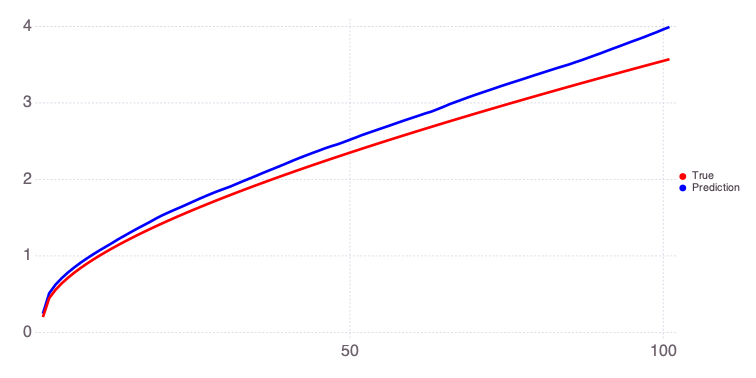

In [12]:
Mads.plotseries([x_true' x_predict]; names=["True", "Prediction"], xmax=101)